# GLQ8780 Camp de terrain - Traitement données EM-31 en VCP 

## Crée par Sébastien Gagnon - 30 juillet 2024

## Importation des modules

In [19]:
# Si vous voulez faire un krigeage :


# Il se peut que vous n'ayez pas toutes ces librairies
# Dans le cas échéant, fait un ---> pip install 'nom de la librairie' 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata

## Extraction des données

In [20]:
# Fonction pour lire un fichier .xyz et extraire les colonnes y et conductivity
def read_xyz(file_path) :
    data = pd.read_csv(file_path, delim_whitespace=True, header=None, skiprows=1, usecols=[0, 2])
    data.columns = ['y', 'conductivity']
    
    return data

In [29]:
# Liste des fichiers .xyz en VCP selon les lignes en X

file_paths = [
    "V24-X150.xyz",
    "V24-X135.xyz",
    "V24-X120.xyz",
    "V24-X105.xyz",
    "V24-X90.xyz",
    "V25-X75.xyz",
    "V25-X60.xyz",
    "V25-X45.xyz",
    "V25-X30.xyz",
    "V25-X15.xyz",
    "V25-X0.xyz"
]

file_paths2 = [
    "H24-X90.xyz", 
    "H24-X105.xyz", 
    "H24-X120.xyz", 
    "H24-X135.xyz", 
    "H24-X150.xyz", 
    "H25-X0.xyz", 
    "H25-X15.xyz", 
    "H25-X30.xyz", 
    "H25-X45.xyz", 
    "H25-X60.xyz", 
    "H25-X75.xyz"
]

In [30]:
# Positions en X des lignes de la carte de Sorel
x_positions = [150, 135, 120, 105, 90, 75, 60, 45, 30, 15, 0]

# Plages des valeurs Y dans notre référentiel de la carte de Sorel
y_start = 10
y_end = 120
true_length = y_start - y_end
# print(all_data) pour visualiser vos données

In [31]:
# Stocker les données de chaque fichier dans un grand vecteur
all_data = []
all_data2 = []

for file_path in file_paths:
    line_data = read_xyz(file_path)
    
    # Normalisation des positions Y avec inversion de l'échelle pour revenir à notre référentiel
    y_min = line_data['y'].min()
    y_max = line_data['y'].max()
    line_data['y'] = y_start - (line_data['y'] - y_min) / (y_max - y_min) * true_length
    
    all_data.append(line_data)

for file_path in file_paths2:
    line_data2 = read_xyz(file_path)
    
    # Normalisation des positions Y avec inversion de l'échelle pour revenir à notre référentiel
    y_min = line_data2['y'].min()
    y_max = line_data2['y'].max()
    line_data2['y'] = y_start - (line_data2['y'] - y_min) / (y_max - y_min) * true_length
    
    all_data2.append(line_data2)


## Graphiques des résultats (À faire séparément par les équipes de rapport)

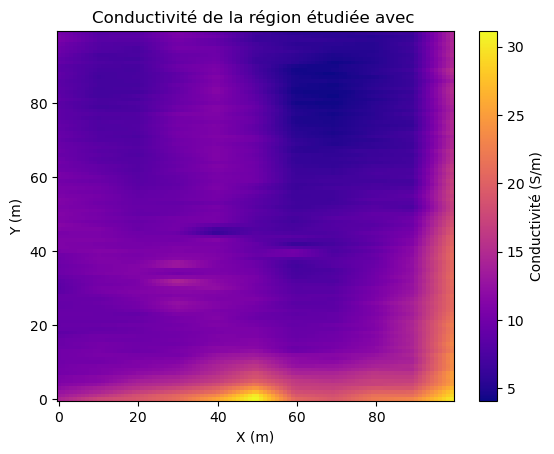

In [32]:
# Préparer les données pour le graphique
x_vals = []
y_vals = []
conductivity_vals = []

for i, line_data in enumerate(all_data):
    x = x_positions[i]
    x_vals.extend([x] * len(line_data))
    y_vals.extend(line_data['y'].tolist())
    conductivity_vals.extend(line_data['conductivity'].tolist())

# Convertir les listes en arrays numpy pour l'interpolation
x_vals = np.array(x_vals)
y_vals = np.array(y_vals)
conductivity_vals = np.array(conductivity_vals)

# Créer la grille pour l'interpolation
x_min, x_max = min(x_positions), max(x_positions)
y_min, y_max = min(y_vals), max(y_vals)
x_grid, y_grid = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Interpoler les valeurs de conductivité sur la grille
conductivity_grid = griddata((x_vals, y_vals), conductivity_vals, (x_grid, y_grid), method='linear')

# Générer une colormap avec les valeurs interpolées avec les paramètres de matplotlib
# plt.figure(figsize=('X, Y de votre choix'))
plt.imshow(conductivity_grid, origin='lower', cmap= 'plasma', aspect='auto')
plt.xlabel('X (m)')
plt.ylabel('Y (m)')
plt.title('Conductivité de la région étudiée avec ')
plt.colorbar(label='Conductivité (S/m)')
    
plt.show()    

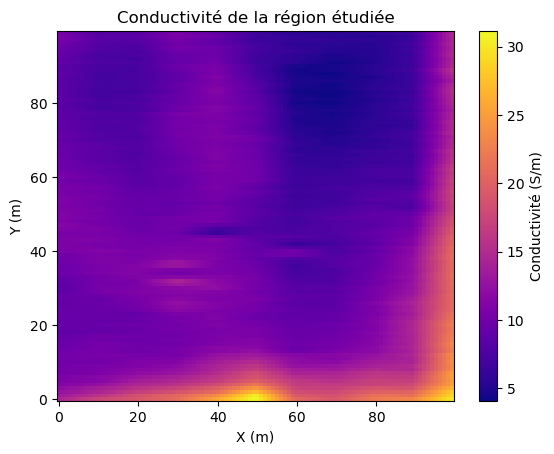

In [33]:
# Préparer les données pour le graphique
x_vals2 = []
y_vals2 = []
conductivity_vals2 = []

for i, line_data in enumerate(all_data2):
    x = x_positions[i]
    x_vals2.extend([x] * len(line_data))
    y_vals2.extend(line_data['y'].tolist())
    conductivity_vals2.extend(line_data['conductivity'].tolist())

# Convertir les listes en arrays numpy pour l'interpolation
x_vals2 = np.array(x_vals)
y_vals2 = np.array(y_vals)
conductivity_vals2 = np.array(conductivity_vals)

# Créer la grille pour l'interpolation
x_min, x_max = min(x_positions), max(x_positions)
y_min, y_max = min(y_vals), max(y_vals)
x_grid, y_grid = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Interpoler les valeurs de conductivité sur la grille
conductivity_grid2 = griddata((x_vals2, y_vals2), conductivity_vals2, (x_grid, y_grid), method='linear')

# Générer une colormap avec les valeurs interpolées avec les paramètres de matplotlib
# plt.figure(figsize=('X, Y de votre choix'))
plt.imshow(conductivity_grid2, origin='lower', cmap= 'plasma', aspect='auto')
plt.xlabel('X (m)')
plt.ylabel('Y (m)')
plt.title('Conductivité de la région étudiée')
plt.colorbar(label='Conductivité (S/m)')
    
plt.show()    